### Score: `[100.5]`

Q1. `[4+11+10]` Good job! 第一题注意一下变量信息即可

Q2. `[11]` Very good job!

Q3. `[4+5+5.5+5.5+5.5 +5.5+5+5+4+5]` Good job! 有一些小问题详见注释

Q4. `[4+5+5.5]` Good job!

各题批注用`### Note`给出，请自行查阅。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# 1. Read the TSV file and name it Sig_Eqs
# Replace 'earthquakes-2024-10-27_00-41-04_+0800.tsv' with the actual file path
Sig_Eqs = pd.read_csv('earthquakes-2024-11-04_16-20-12_+0800.tsv', sep='\t')  # Use tab as the separator

# Assuming the DataFrame has columns 'Country' and 'Deaths'
# Group by country and sum the deaths
total_deaths_by_country = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()

# Sort the countries by total deaths in descending order and get the top 20
top_20_countries = total_deaths_by_country.sort_values(by='Deaths', ascending=False).head(20)

# Print the top 20 countries with the total number of deaths
print("\nTop 20 countries and their total number of deaths from earthquakes:")
print(top_20_countries)


### Note: 变量应选择Total_Deaths
'''
从数据界面可以看到数据标签的详细注释
Deaths: Whenever possible, numbers of deaths are listed.
Total Deaths: Whenever possible, total number of deaths from the earthquake and secondary effects are listed.
'''


Top 20 countries and their total number of deaths from earthquakes:
          Country     Deaths
28          CHINA  2075947.0
141        TURKEY  1188881.0
65           IRAN  1011453.0
69          ITALY   498418.0
132         SYRIA   439224.0
58          HAITI   323478.0
10     AZERBAIJAN   317219.0
71          JAPAN   279607.0
6         ARMENIA   191890.0
103      PAKISTAN   145083.0
66           IRAQ   136200.0
40        ECUADOR   135496.0
142  TURKMENISTAN   117412.0
107          PERU   102169.0
68         ISRAEL    90388.0
110      PORTUGAL    83572.0
53         GREECE    80378.0
27          CHILE    64277.0
62          INDIA    63507.0
133        TAIWAN    57153.0


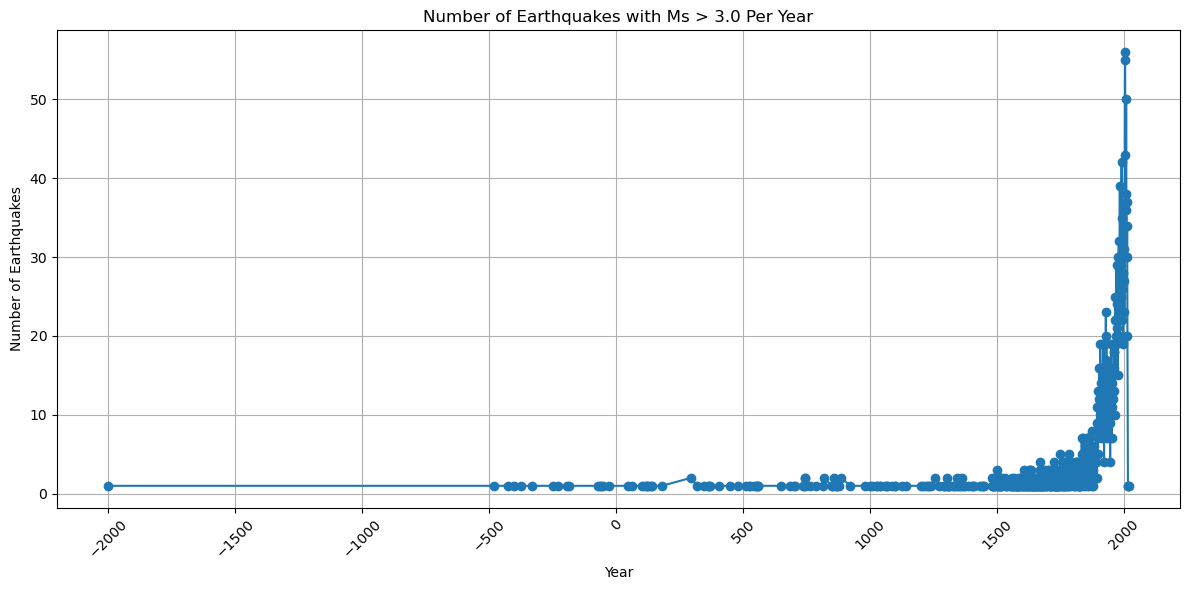

In [4]:
# 1.2 Compute the total number of earthquakes with magnitude larger than 3.0 each year
# Filter earthquakes with magnitude larger than 3.0
filtered_eqs = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]

# Group by year and count the number of earthquakes
earthquake_counts = filtered_eqs.groupby('Year').size().reset_index(name='Count')

# Plot the time series of earthquake counts
plt.figure(figsize=(12, 6))
plt.plot(earthquake_counts['Year'], earthquake_counts['Count'], marker='o')
plt.title('Number of Earthquakes with Ms > 3.0 Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observe any trends in the data:
# The plot of earthquakes with a magnitude greater than 3.0 per year shows a significant increase in recorded earthquakes over time, especially in recent centuries.

# Here's a breakdown of the observed trends and possible reasons behind them:
# From ancient times until roughly the early 20th century, the number of recorded earthquakes per year remains very low and relatively stable.  This suggests either low seismic activity detection or limited documentation.
# Starting around the early 1900s, there is a noticeable and steep increase in the number of recorded earthquakes, with a particularly sharp rise post-1950. This trend continues into the 21st century, where the count reaches much higher levels.
# The significant increase in recorded earthquakes is more likely due to technological and logistical improvements rather than an actual increase in global seismic activity.  The rise in detection sensitivity and global cooperation in seismic monitoring are key drivers of the upward trend observed in the data.


In [11]:
def CountEq_LargestEq(country_name):
   # Create a 'Date' column by combining 'Year', 'Mo', and 'Dy' into a standardized format
    Sig_Eqs['Date'] = (
        Sig_Eqs['Year'].astype(str) + '-' +
        Sig_Eqs['Mo'].fillna(1).astype(int).astype(str).str.zfill(2) + '-' +
        Sig_Eqs['Dy'].fillna(1).astype(int).astype(str).str.zfill(2)
    )
    # Filter earthquakes for the specified country
    country_earthquakes = Sig_Eqs[Sig_Eqs['Country'] == country_name]  
      
    # Total number of earthquakes in the specified country
    total_earthquakes = len(country_earthquakes)  
      
    # Return if there are no earthquakes for the country
    if total_earthquakes == 0:
        return (0, None, None, None, None)  # Adjusted to return five values

    # Drop rows with NaN values in the 'Ms' column (magnitude)
    country_earthquakes = country_earthquakes.dropna(subset=['Ms'])
    
    # If there are no valid earthquakes left after dropping NaN values, return totals
    if country_earthquakes.empty:
        return (total_earthquakes, None, None, None, None)  # Adjusted to return five values
    
    # Find the largest earthquake
    largest_eq_index = country_earthquakes['Ms'].idxmax()
    largest_eq = country_earthquakes.loc[largest_eq_index]

  
     # Return total number of earthquakes and details of the largest earthquake
    return (total_earthquakes, largest_eq['Date'], largest_eq['Latitude'],
            largest_eq['Longitude'], largest_eq['Ms'])

# Get a unique list of countries from the dataset
unique_countries = Sig_Eqs['Country'].unique()

# Create a dictionary to store results for each country
results = {country: CountEq_LargestEq(country) for country in unique_countries}


# Convert the results dictionary to a DataFrame for easier manipulation
results_df = pd.DataFrame.from_dict(
    results, 
    orient='index', 
    columns=['Total_Earthquakes', 'Largest_Earthquake_Date', 
             'Largest_Earthquake_Latitude', 'Largest_Earthquake_Longitude', 
             'Largest_Earthquake_Ms']
)

# Sort the DataFrame by the total number of earthquakes in descending order
sorted_results = results_df.sort_values(by='Total_Earthquakes', ascending=False)

# Print the sorted results
print(sorted_results)

### Note: 日期的年份用整数形式就更好了

                   Total_Earthquakes Largest_Earthquake_Date  \
CHINA                            623            1920.0-12-16   
INDONESIA                        395            2004.0-12-26   
IRAN                             386             856.0-12-22   
JAPAN                            359             869.0-07-13   
ITALY                            332            1915.0-01-13   
...                              ...                     ...   
TRINIDAD; GRENADA                  1                    None   
URUGUAY                            1                    None   
TIMOR SEA                          1            1891.0-10-05   
BALKANS                            1                    None   
NaN                                0                    None   

                   Largest_Earthquake_Latitude  Largest_Earthquake_Longitude  \
CHINA                                   36.601                       105.317   
INDONESIA                                3.295                        9

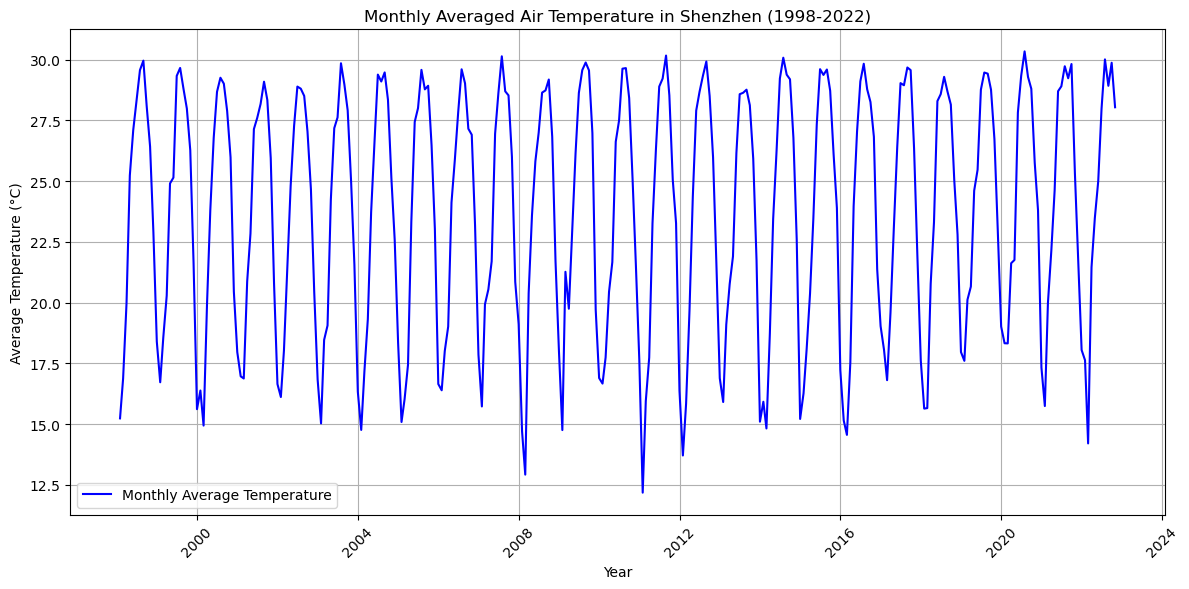

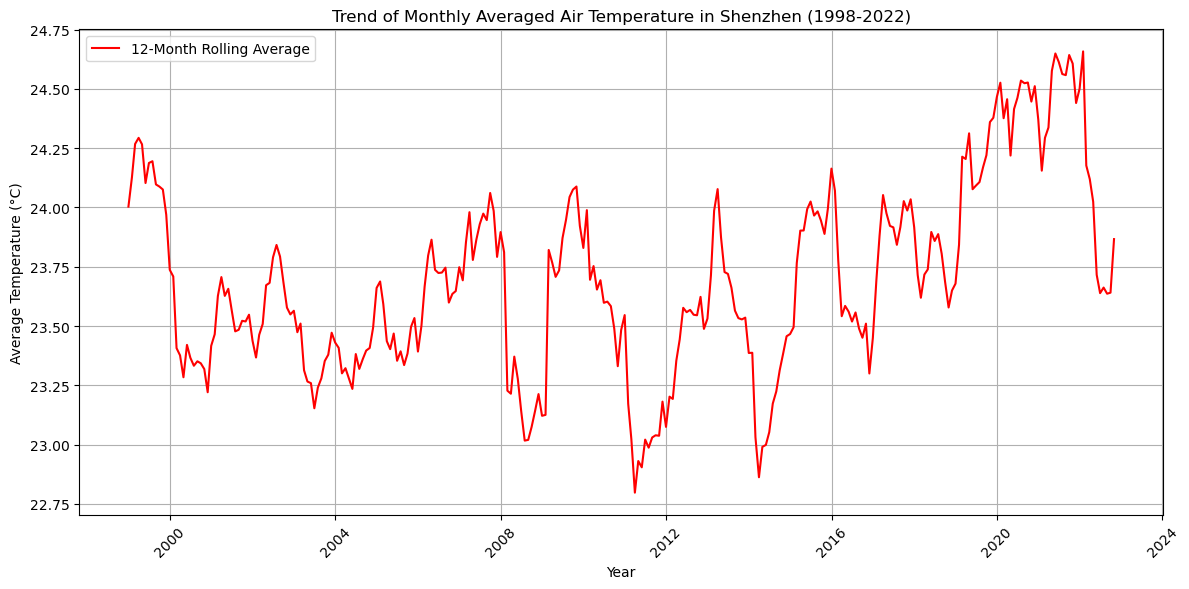

In [8]:
# 2. Air temperature in Shenzhen during the past 25 years

# Load the data
data = pd.read_csv('Baoan_Weather_1998_2022.csv', low_memory=False) #This option tells Pandas to process the file in chunks, which can help it infer the correct data types for each column.

# Split the 'TMP' column into 'Temperature' and 'Quality_Code'
data[['Temperature', 'Quality_Code']] = data['TMP'].str.split(',', expand=True)

# Convert Temperature to numeric (tenths of degrees Celsius)
# Apply the scaling factor to convert the temperature values to degrees Celsius by dividing each TMP value by 10.
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce') / 10

# Convert Quality_Code to string type (if needed)
data['Quality_Code'] = data['Quality_Code'].astype(str)

# Filter out missing temperature values
# Exclude any rows where the TMP value equals +9999, indicating a missing observation.
data = data[data['Temperature']!= 9999]

# Filter based on quality codes
valid_quality_codes = ['0', '1', '4', '5'] # Retain only those rows where the quality code is one of the accepted values (0, 1, 4, 5). This ensures that we only analyze temperature readings that are considered reliable.
data = data[data['Quality_Code'].isin(valid_quality_codes)]
# All quality codes in the TMP data column are 1, and it seems that no filtering is OK

# Convert observation time to datetime format (assuming there's a 'Date_Time' column)
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')  # Adjust the column name if necessary

# Drop rows where 'Date_Time' conversion failed
data = data.dropna(subset=['DATE'])

# Set Date_Time as the index
data.set_index('DATE', inplace=True)

# Resample to monthly averages
monthly_avg_temp = data['Temperature'].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, label='Monthly Average Temperature', color='b')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Analyzing the trend
trend = monthly_avg_temp.rolling(window=12).mean()  # 12-month rolling average for trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, trend, label='12-Month Rolling Average', color='r')
plt.title('Trend of Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# The data clearly shows an annual cyclical pattern, with temperatures peaking in the summer months (June, July, August) and reaching their lowest points in the winter months (January, February). This is due to the Earth's tilt and orbit, which create the four seasons. Summer months generally have higher temperatures, while winter months have lower temperatures.
# There appears to be a gradual upward trend, especially in the summer months. For instance, temperatures in July and August have approached or exceeded 30°C in many years. Winter temperatures also show a slight upward trend, particularly in January and February.
# In the summer, there are several months with temperatures above 29°C, especially in the summers of 2003, 2004, 2009, 2014, and 2022, where temperatures reached above 29°C; In the winter, there are several months with temperatures below 15°C, particularly in January 2011 and 2012, where temperatures were below 13°C.
# In addition to seasonal variations, there are also fluctuations from year to year. Some years have relatively higher temperatures, while others have lower temperatures. For example, the summers of 2003, 2004, 2009, 2014, and 2022 had higher temperatures, while the winters of 2011 and 2012 were colder.
# Overall, the temperatures seem to be increasing gradually, which may be related to global climate change and global warming.

In [3]:
# 3.1
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], ### Note: 不需要跳过索引为2的行，索引为2的行也是数据
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False) # Load the data with low_memory=False to avoid DtypeWarning
# Convert WMO_WIND to numeric, forcing errors to NaN
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# Now group by Storm Identifier (SID) and get the maximum wind speed for each storm
largest_hurricanes = df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).nlargest(10, 'WMO_WIND')

# Display the results
print(largest_hurricanes[['NAME', 'WMO_WIND']])

                   NAME  WMO_WIND
SID                              
2015293N13266  PATRICIA     185.0
1980214N11330     ALLEN     165.0
1935241N23291      None     160.0
1988253N12306   GILBERT     160.0
1997253N12255     LINDA     160.0
2005289N18282     WILMA     160.0
2019236N10314    DORIAN     160.0
1998295N12284     MITCH     155.0
2005261N21290      RITA     155.0
2009288N07267      RICK     155.0


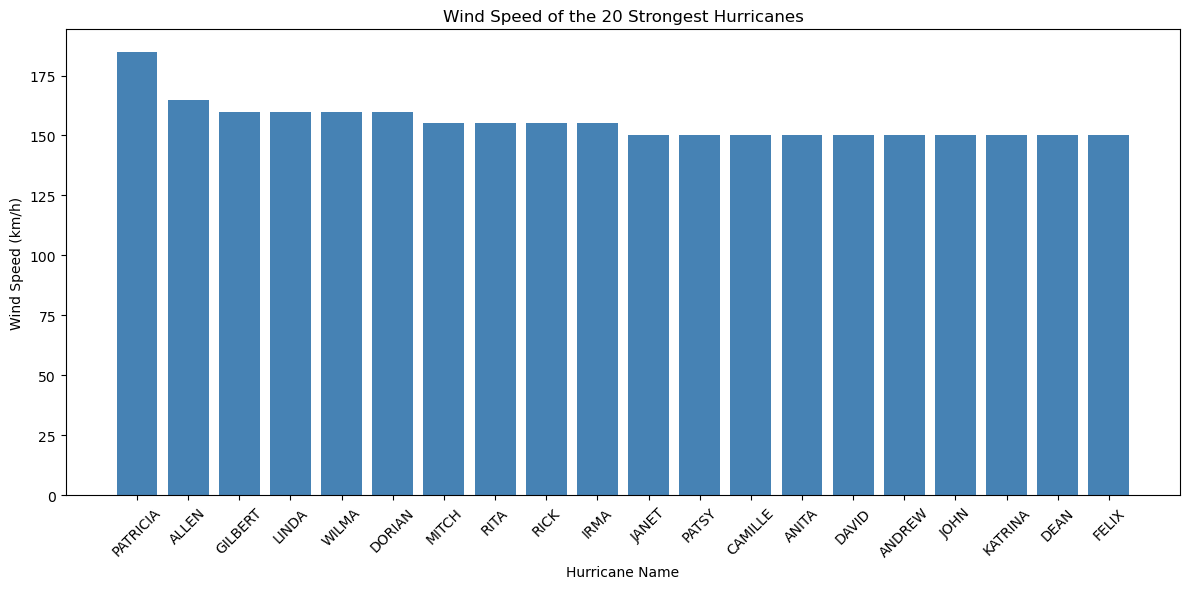

In [4]:
# 3.2
# Ensure there are no NaN values in NAME or WMO_WIND
strongest_hurricanes = df.dropna(subset=['NAME', 'WMO_WIND']).groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).nlargest(20, 'WMO_WIND')

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(strongest_hurricanes['NAME'], strongest_hurricanes['WMO_WIND'], color='steelblue')
plt.xticks(rotation=45)
plt.title('Wind Speed of the 20 Strongest Hurricanes')
plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed (km/h)')
plt.tight_layout()
plt.show()

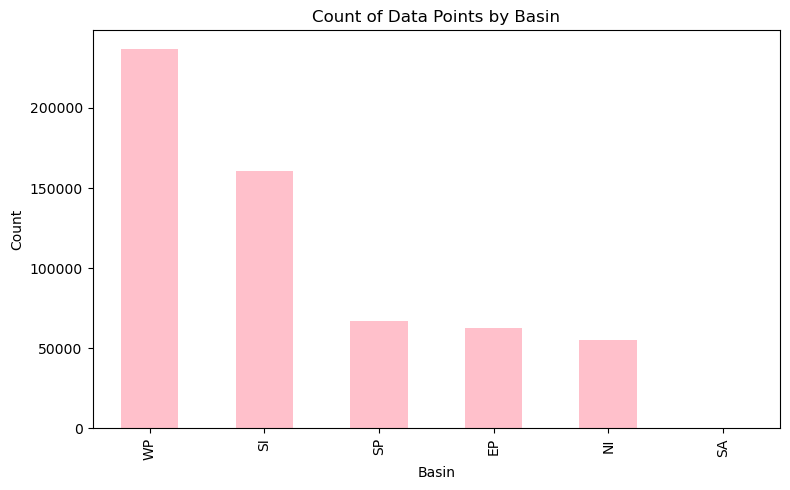

In [5]:
# 3.3
# Count the number of data points by Basin
basin_counts = df['BASIN'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
basin_counts.plot(kind='bar', color='pink')
plt.title('Count of Data Points by Basin')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

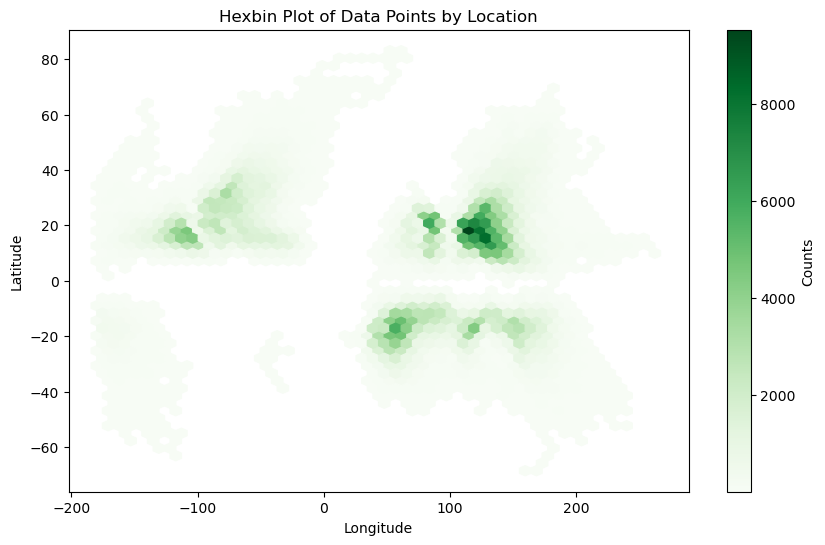

In [8]:
# 3.4
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Greens', mincnt=1) # # gridsize controls the size of each hexagon, cmap specifies the color mapping, and mincnt sets the minimum count
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Data Points by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

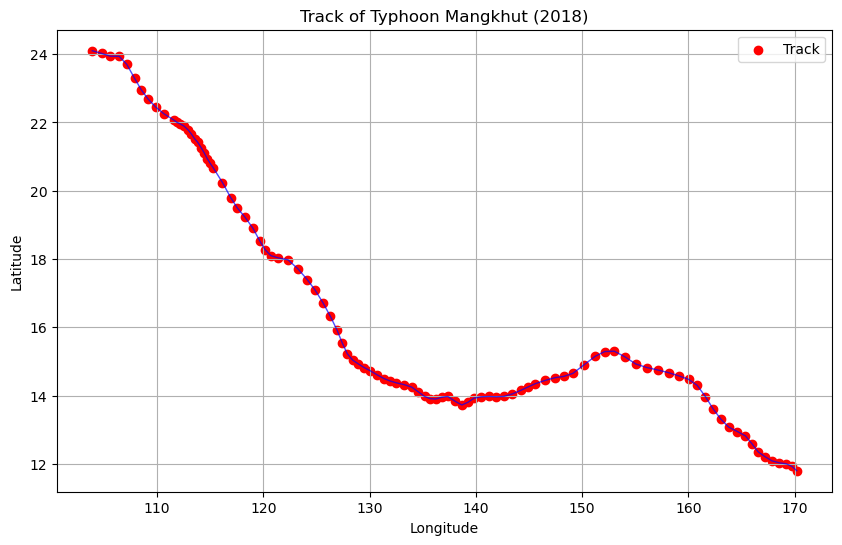

In [7]:
# 3.5
# Filter for Typhoon Mangkhut (2018)
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]

# Plot the track
plt.figure(figsize=(10, 6))
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c='red', marker='o', label='Track')
plt.plot(mangkhut['LON'], mangkhut['LAT'], color='blue', linewidth=1, linestyle='-', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.legend()
plt.grid()
plt.show()

In [15]:
# 3.6
# Create a filtered dataframe
filtered_df = df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
# Display the filtered DataFrame
print(filtered_df.head())

                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   

                  ISO_TIME NATURE      LAT      LON  WMO_WIND WMO_PRES  \
350393 1970-02-19 00:00:00     TS  7.00000  151.400       NaN     1006   
350394 1970-02-19 03:00:00     TS  7.24752  151.205       NaN            
350395 1970-02-19 06:00:00     TS  7.50000  151.000       NaN     1002   
350396 1970-02-19 09:00:00     TS  7.75747  150.772       NaN            
350397 1970-02-19 12:00:00     TS  8.00000  150.500       NaN      998   

       WMO_AGENCY TRACK_TYPE  DIST2LAND LANDFALL           IFLAG  
350393      tokyo       main       1088     1088  _OO___________  
350394                  main       1109   

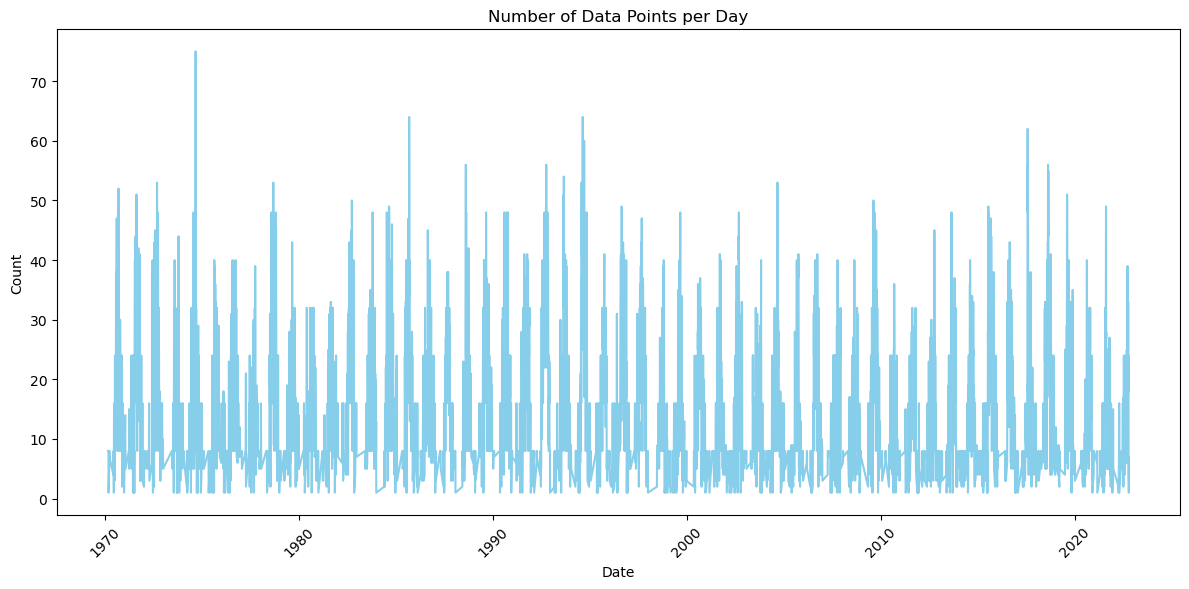

In [21]:
# 3.7
# Count of data points per day
daily_counts = filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

# Plot
plt.figure(figsize=(12, 6))
daily_counts.plot(color='skyblue')
plt.title('Number of Data Points per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

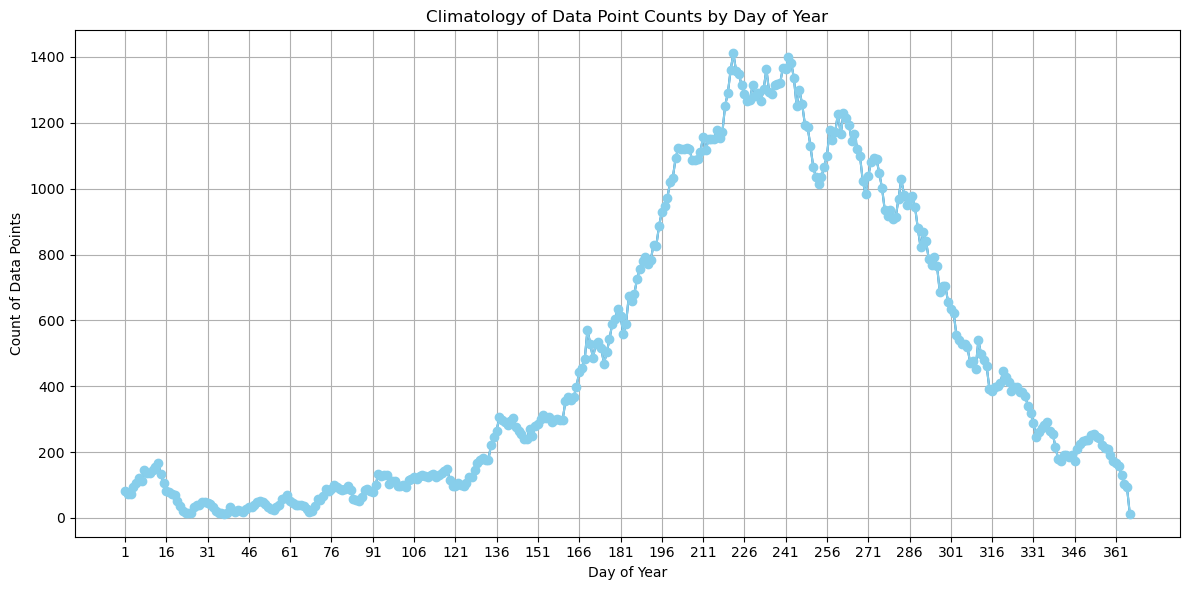

In [18]:
# 3.8
# Add a day of year column using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'day_of_year'] = filtered_df['ISO_TIME'].dt.dayofyear

# Group by day of year and count
climatology_counts = filtered_df.groupby('day_of_year').size()

# Plot
plt.figure(figsize=(12, 6))
climatology_counts.plot()
plt.title('Climatology of Data Point Counts by Day of Year')
plt.plot(climatology_counts.index, climatology_counts.values, marker='o', color='skyblue')
plt.xlabel('Day of Year')
plt.ylabel('Count of Data Points')
plt.xticks(range(1, 366, 15))  # Adjust the x-ticks for better readability
plt.grid()
plt.tight_layout()
plt.show()

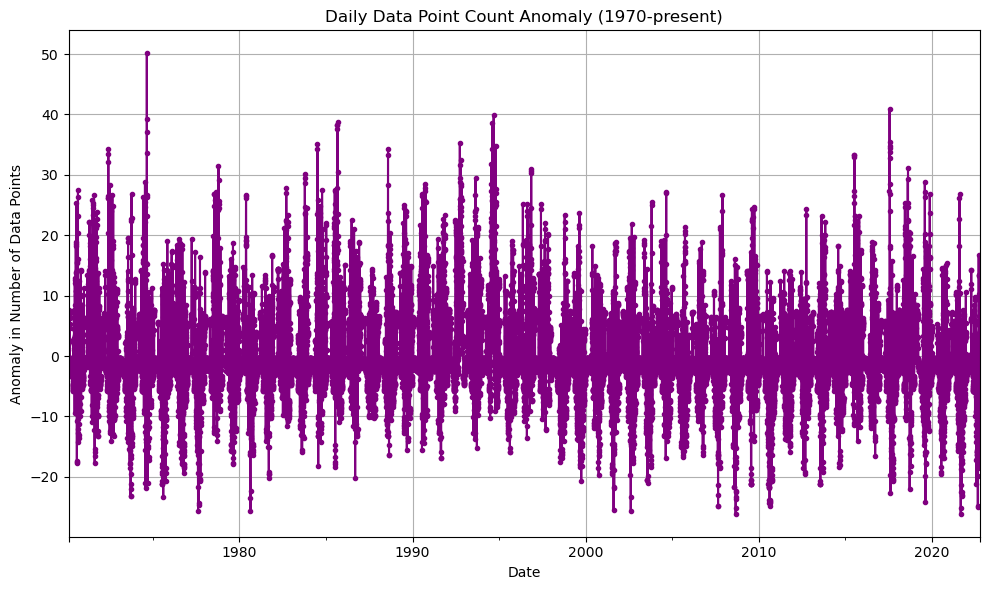

In [33]:
#3.9
# Calculation of climatology for each day (by dayofyear)
climatology = filtered_df.groupby('day_of_year').size() / len(filtered_df['ISO_TIME'].dt.year.unique())

### Note: 筛选后的数据日期从1970-02-19到2022-10-12，直接除并不是最精确的，不是所有日期的计数都一样

# Calculate the actual number of data points for each day
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()

# Map daily dayofyear into climatology, ensuring that the lengths match
day_of_year_series = daily_counts.index.dayofyear
climatology_mapped = day_of_year_series.map(climatology)

# Calculate outliers: the number of data points per day minus climatological values
daily_anomaly = daily_counts - climatology_mapped.values

# Chart outliers
plt.figure(figsize=(10, 6))
daily_anomaly.plot(color='purple', marker='.')
plt.title('Daily Data Point Count Anomaly (1970-present)')
plt.xlabel('Date')
plt.ylabel('Anomaly in Number of Data Points')
plt.grid(True)
plt.tight_layout() 

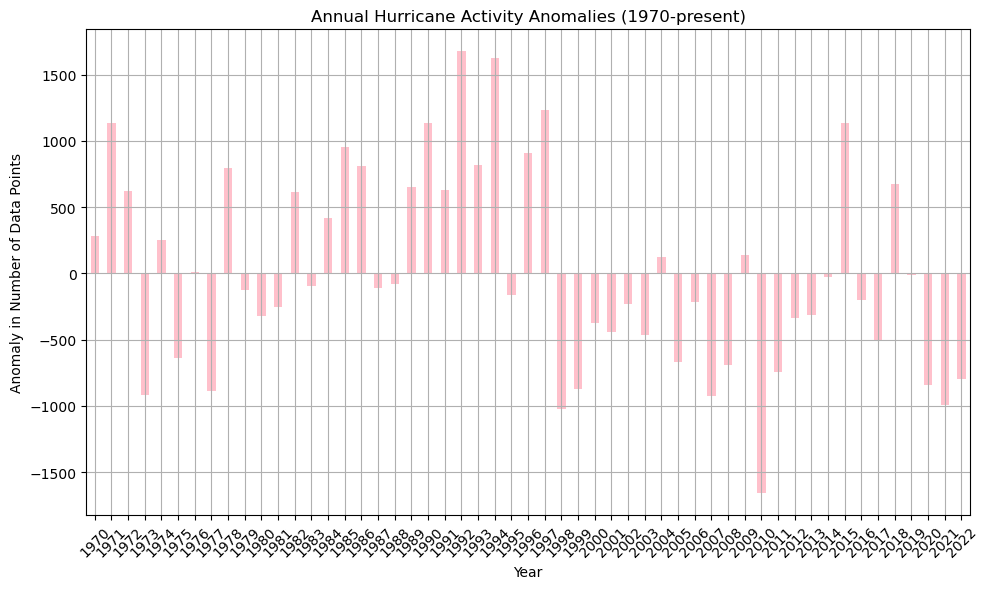

The most anomalous year for hurricane activity:
ISO_TIME
1992-12-31    1674.603774
1994-12-31    1624.849057
1997-12-31    1228.849057
1990-12-31    1134.849057
2015-12-31    1132.849057
1971-12-31    1131.849057
1985-12-31     951.849057
1996-12-31     904.603774
1993-12-31     813.849057
1986-12-31     808.849057
dtype: float64


In [34]:
#  Resampling outliers annually
annual_anomaly = daily_anomaly.resample('Y').sum()

# Plot an annual outlier time series
plt.figure(figsize=(10, 6))
annual_anomaly.plot(kind='bar', color='pink')
plt.title('Annual Hurricane Activity Anomalies (1970-present)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Number of Data Points')
# Set the scale and label for the X-axis
plt.xticks(ticks=range(len(annual_anomaly)), labels=annual_anomaly.index.year, rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()

# Print the previous years with the largest outliers
print("The most anomalous year for hurricane activity:")
print(annual_anomaly.nlargest(10))

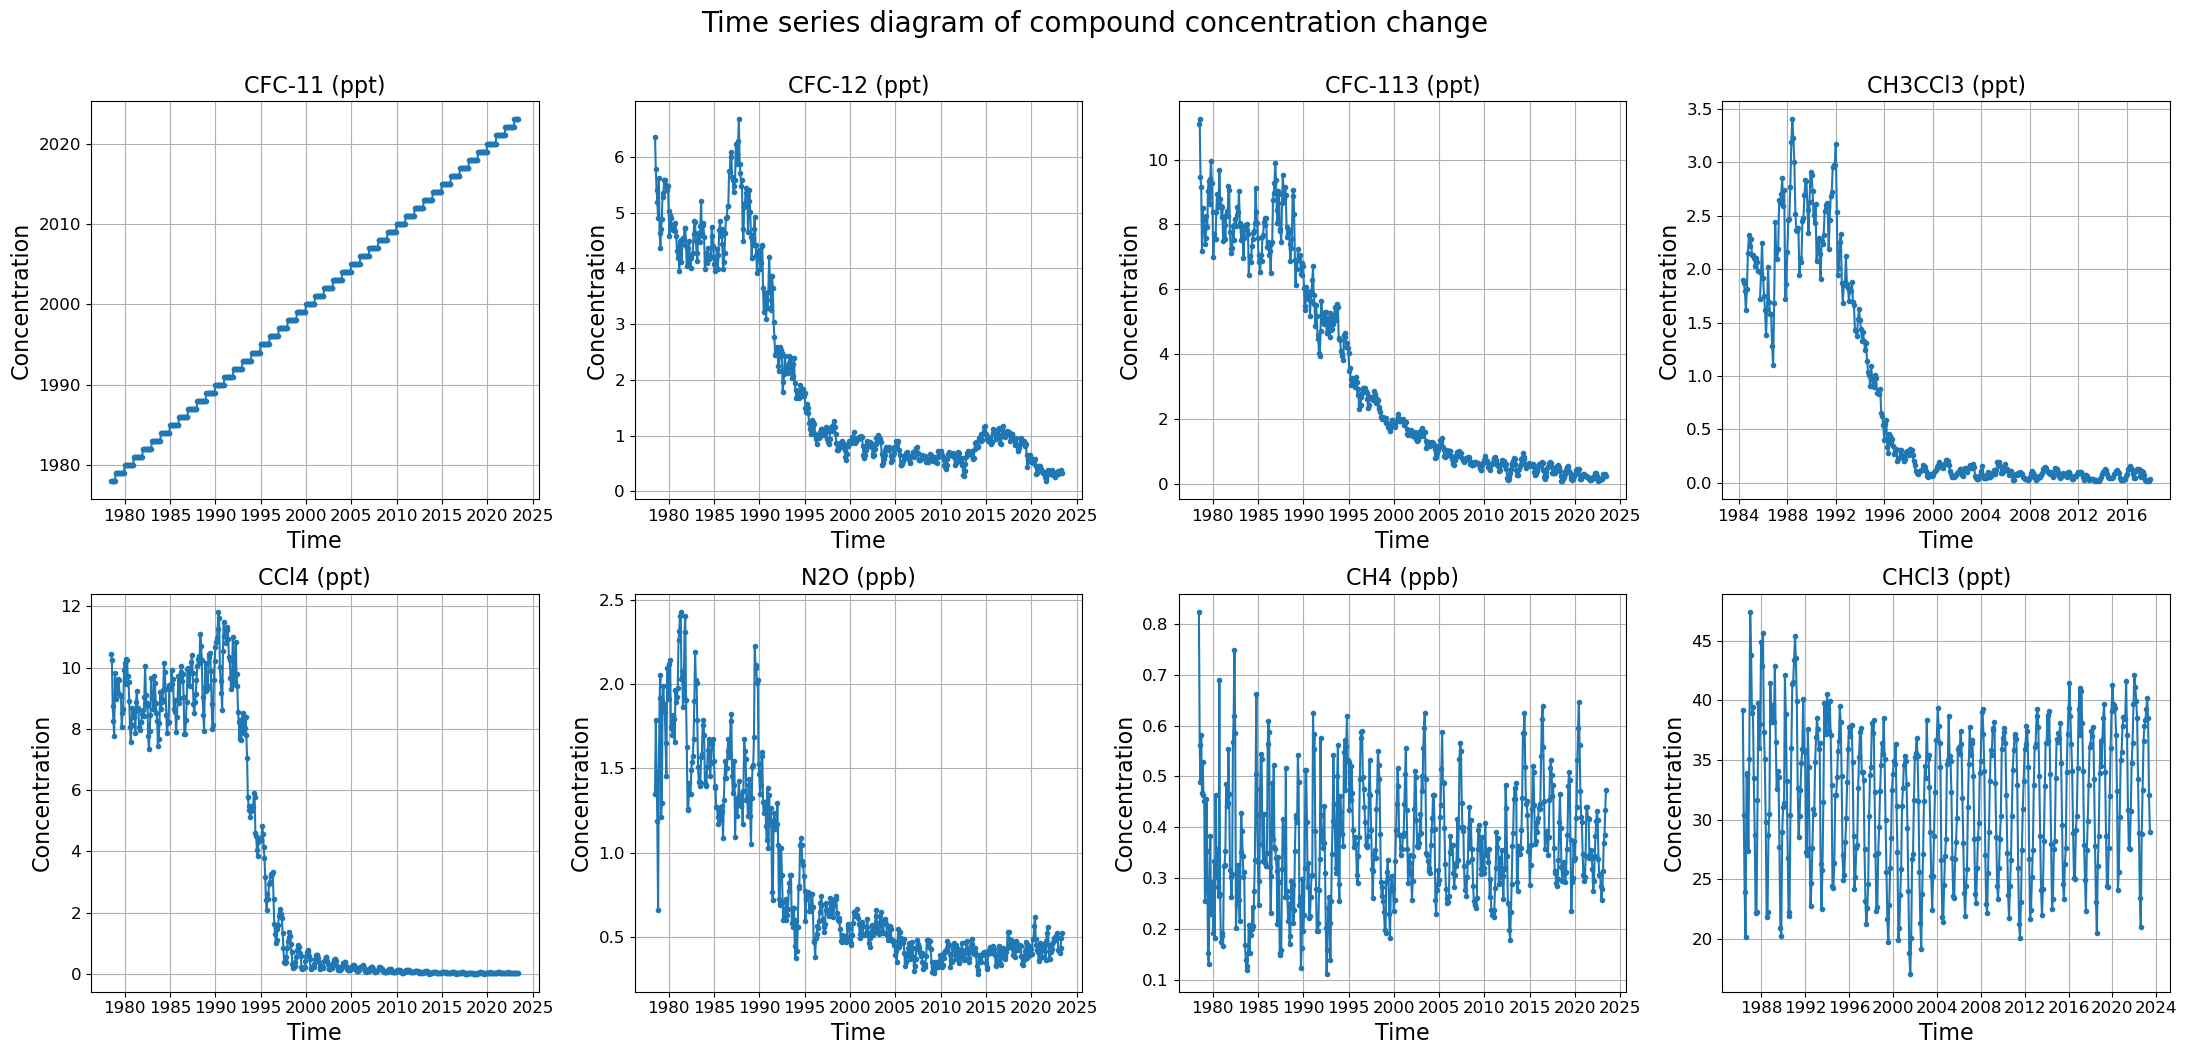

In [17]:
# 4. Explore a data set
# 4.1/4.2
# Read the XLSX file
file_path = 'global_mean_md.xlsx'
data = pd.read_excel(file_path, header=0)

# Clear outliers (0 and -99) from data
data.replace({0: np.nan, -99: np.nan}, inplace=True)

# Read the time and combine the year and month
data['Date'] = pd.to_datetime(data['YYYY'].astype(str) + '-' + data['MM'].astype(str))

# Select the compound column that you want to draw
compounds = ['CFC-11 (ppt)', 'CFC-12 (ppt)', 'CFC-113 (ppt)', 
             'CH3CCl3 (ppt)', 'CCl4 (ppt)', 'N2O (ppb)', 
             'CH4 (ppb)', 'CHCl3 (ppt)']

# Create a 2x4 subgraph
fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.flatten()  # Flatten the 2-D group to 1-D

# Plot each compound
for i, compound in enumerate(compounds):
    axes[i].plot(data['Date'], data[compound], marker='o', linestyle='-', markersize=3)
    axes[i].set_title(compound, fontsize=16)
    axes[i].set_xlabel('Time', fontsize=16)
    axes[i].set_ylabel('Concentration', fontsize=16)
    axes[i].grid(True)  # Add grid
    axes[i].tick_params(axis='both', labelsize=12)  # Set the scale font size

# Adjust layout
plt.tight_layout()
plt.suptitle('Time series diagram of compound concentration change', fontsize=20, y=1.05)
plt.show()

### Note: 我查看了.xlsx的数据，CFC-11的数据是不是不对？怎么和年份完全一致？

In [21]:
# 4.3
# Statistical description:some simple statistical checks
# Create a relational data set
correlation_data = data[compounds]
# Inspection statistics include:count;mean;Standard deviation(std);25%;median（50%）;75%;min;max;
description = correlation_data.describe().round(2)  # Keep two decimal places
# Print result
print(description)

       CFC-11 (ppt)  CFC-12 (ppt)  CFC-113 (ppt)  CH3CCl3 (ppt)  CCl4 (ppt)  \
count        540.00        540.00         540.00         403.00      540.00   
mean        2000.50          2.01           3.28           0.77        3.50   
std           13.01          1.80           3.15           0.97        4.24   
min         1978.00          0.18           0.08           0.02        0.01   
25%         1989.00          0.66           0.60           0.08        0.06   
50%         2000.50          0.97           1.76           0.14        0.39   
75%         2012.00          4.04           6.51           1.67        8.49   
max         2023.00          6.67          11.24           3.40       11.82   

       N2O (ppb)  CH4 (ppb)  CHCl3 (ppt)  
count     540.00     540.00       446.00  
mean        0.81       0.37        32.05  
std         0.53       0.11         6.07  
min         0.28       0.11        17.10  
25%         0.43       0.29        27.21  
50%         0.55       0.35   

Correlation matrix：
               CFC-11 (ppt)  CFC-12 (ppt)  CFC-113 (ppt)  CH3CCl3 (ppt)  \
CFC-11 (ppt)       1.000000     -0.751490      -0.896233      -0.799222   
CFC-12 (ppt)      -0.751490      1.000000       0.947058       0.885171   
CFC-113 (ppt)     -0.896233      0.947058       1.000000       0.904691   
CH3CCl3 (ppt)     -0.799222      0.885171       0.904691       1.000000   
CCl4 (ppt)        -0.826369      0.896567       0.927838       0.976105   
N2O (ppb)         -0.797238      0.902664       0.897723       0.860675   
CH4 (ppb)          0.150806     -0.144639      -0.129434      -0.177175   
CHCl3 (ppt)       -0.089873      0.210307       0.201333       0.193420   

               CCl4 (ppt)  N2O (ppb)  CH4 (ppb)  CHCl3 (ppt)  
CFC-11 (ppt)    -0.826369  -0.797238   0.150806    -0.089873  
CFC-12 (ppt)     0.896567   0.902664  -0.144639     0.210307  
CFC-113 (ppt)    0.927838   0.897723  -0.129434     0.201333  
CH3CCl3 (ppt)    0.976105   0.860675  -0.177175     

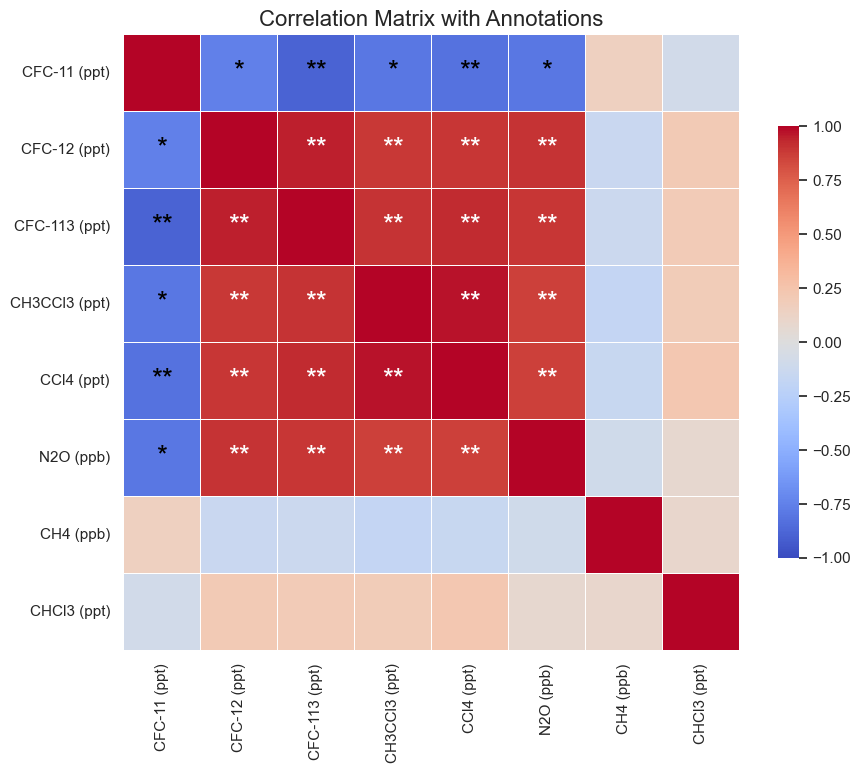

In [53]:
# Extract correlation analysis data
correlation_data = data[compounds].dropna()

# Computed correlation matrix
correlation_matrix = correlation_data.corr()

# Set drawing style
sns.set(style="white")

# Create a heat map
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=False,
                       cmap="coolwarm", vmin=-1, vmax=1, square=True,
                       cbar_kws={"shrink": .7}, linewidths=0.5)

# Add correlation annotation
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        r = correlation_matrix.iloc[i, j]
        if i != j:  # Avoid marking diagonals
            color = 'white' if r > 0 else 'black'
            if 0.5 < abs(r) < 0.8:
                heatmap.text(j + 0.5, i + 0.5, '*', ha='center', va='center', color=color, fontsize=20)
            elif 0.8 < abs(r) < 1:
                heatmap.text(j + 0.5, i + 0.5, '**', ha='center', va='center', color=color, fontsize=20)
# Output correlation value
print("Correlation matrix：")
print(correlation_matrix)

# plt
plt.title('Correlation Matrix with Annotations', fontsize=16)
plt.show()

In [52]:
# Normality test
normality_results = {}
for compound in compounds:
    stat, p_value = stats.shapiro(correlation_data[compound].dropna())
    normality_results[compound] = p_value

# Print the results of the normality tes
print("Normality test results (p-value):")
for compound, p in normality_results.items():
    print(f"{compound}: {p:.4f}")

Normality test results (p-value):
CFC-11 (ppt): 0.0000
CFC-12 (ppt): 0.0000
CFC-113 (ppt): 0.0000
CH3CCl3 (ppt): 0.0000
CCl4 (ppt): 0.0000
N2O (ppb): 0.0000
CH4 (ppb): 0.0016
CHCl3 (ppt): 0.0000


In [9]:
# report the findings.
# From the results of data visualization from 1980 to 2024, only the concentration of CFC-11 increased year by year, showing a linear trend; CFC-12, CFC-13, CH3CCl3, CCl4 and N2O all showed a decreasing trend, and finally reached a certain critical value and then stabilized. However, CH4 and CHCl3 showed a fluctuating trend with seasonal changes.
# Second, in this dataset, I observed a significant negative correlation between chlorofluorocarbon (CFCs) and chlorofluorocarbon (HCFCs) substances CFC-11, CFC-12, CFC-113, CH3CCl3, and CCl4, which may mean that their distribution and origin in the atmosphere are somewhat similar. Or their behavior in the environment is influenced by similar factors. In particular, the high negative correlation between CFC-11, CFC-12, CFC-113, and CH3CCl3 may reflect their interrelationship and potential common source in atmospheric chemical processes. On the other hand, CCl4 shows a high positive correlation with these substances, which may indicate that its distribution and origin in the atmosphere is similar to other CFCs and HCFCs.
#The positive correlation of N2O and CH4 with CFC-like substances suggests that they may have a common source or interact with each other in some environmental processes, which may be related to global climate change and atmospheric chemical processes. However, the low correlation of CHCl3 with other substances may indicate that its distribution and origin in the environment is different from that of other substances, or that its chemical behavior in the atmosphere is different from that of other substances.
# With the exception of CH4, the distribution of all the other variables deviated significantly from the normal distribution, which may have implications for statistical analysis and model building and need to be considered in subsequent data analysis.
#These findings suggest that we need to consider the interactions and common sources of these substances when studying atmospheric chemistry and global climate change. Further research could focus on the emission sources of these substances, their atmospheric transport routes, and their chemical reactions in the atmosphere. In addition, considering that CH4 is an important greenhouse gas, its positive correlation with CFCs may have an important impact on the global greenhouse effect, so further study of the interaction mechanism between them is needed. At the same time, more research is needed to understand the independent behavior and influencing factors of CHCl3, a substance with low correlation. These studies will help us better understand and predict changes in atmospheric composition and their impact on the environment and climate change.